# Exploraroty Work On School Ratings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
import numpy as np
import seaborn as sns


from config import gkey
gmaps.configure(api_key=gkey)

### Import Data Files And Merge

In [2]:
# read file with school, flood, and crime data and make it into a dataframe
file1 = pd.read_csv("Resources/combined_flood_crime_and_school_data.csv")
df1 = pd.DataFrame(file1)

In [3]:
# read file with home values and make it into a dataframe
file2 = pd.read_csv("Resources/Inner_Loop_18_19.csv")
df2 = pd.DataFrame(file2)

In [4]:
# rename joining columns to match df1
df2 = df2.rename(columns={'NEIGHBORHOOD_CODE_2019':"NEIGHBORHOOD_CODE","NEIGHBORHOOD_GROUP_2019":"NEIGHBORHOOD_GROUP"})

In [5]:
# merge the two dataframes
data = pd.merge(df1,df2,how='left',on=["ACCOUNT","NEIGHBORHOOD_CODE","NEIGHBORHOOD_GROUP"])
data.to_csv("Output/combined_data.csv")
data.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Address', 'Latitude', 'Longitude',
       'Flood Description', 'Flood Zone', 'Flood Risk', 'SITE_ADDR_1',
       'ACCOUNT', 'TAX_YEAR', 'SITE_ADDR_2', 'SITE_ADDR_3', 'STATE_CLASS',
       'SCHOOL_DIST', 'NEIGHBORHOOD_CODE', 'NEIGHBORHOOD_GROUP',
       'MARKET_AREA_1_DSCR', 'MARKET_AREA_2_DSCR', 'TOTAL_BUILDING_AREA_x',
       'TOTAL_LAND_AREA_x', 'ACREAGE_x', 'LAND_VALUE', 'ASSESSED_VALUE',
       'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE', 'LAST_INSPECTED_DATE',
       'NEW_OWNER_DATE', 'Offense Count', 'crime_rank',
       'Elementary Public School ID', 'Elementary Public School Name',
       'Elementary Public School Rating', 'Elementary Charter School ID',
       'Elementary Charter School Name', 'Elementary Charter School Rating',
       'Public Middle School ID', 'Public Middle School Name',
       'Public Middle School Rating', 'Charter Middle School ID',
       'Charter Middle School Name', 'Charter Middle School Rating',
       'Publ

In [6]:
# rename column to show zip code
data = data.rename(columns={'SITE_ADDR_3':"Zip Code"})

### Compare School Ratings Vs. Total Appraised Value

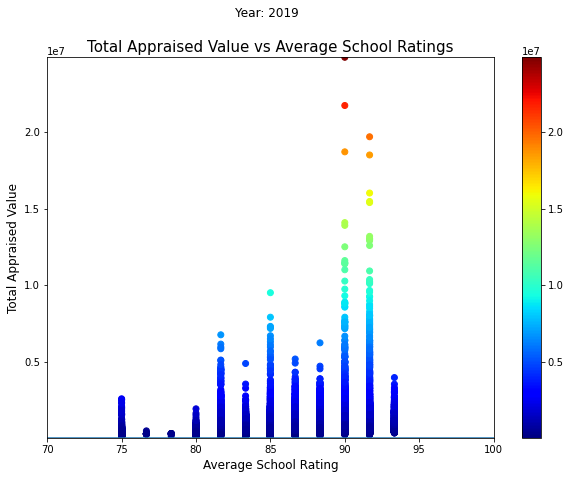

In [7]:
# plot average school ratings vs property values
fig1,ax = plt.subplots(figsize=(10,7))
chart1 = ax.scatter(
    data['Average School Rating'],data["TOTAL_APPRAISED_VALUE"],c=data["TOTAL_APPRAISED_VALUE"],
    cmap=plt.cm.jet)
fig1.colorbar(chart1, ax=ax)
plt.plot(data['Average School Rating'])
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Ratings", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(data["TOTAL_APPRAISED_VALUE"].min(),data["TOTAL_APPRAISED_VALUE"].max())
plt.show()

### Evaluate Trends In All Schools In Harris County, TX

In [8]:
# import data for school in all of Harris County
file3 = pd.read_csv("Resources/Schools_Ratings_Harris_Co.csv")
df3 = pd.DataFrame(file3)
df3.head()

,Unnamed: 0,School.ID,School.Name,Street.Address,CITY,ZIP,County,District.Name,School.Type,Charter.Trad,...,Math.Current-2,Math.Change,Student.Growth.Reading,Student.Growth.Math,School.Program,Community.Resources,longitude,latitude,Student.Teacher.Ratio,Grade.Range
0,23,101871041,A+ UNLIMITED POTENTIAL MIDDLE,5100 MONTROSE,HOUSTON,77006.0,HARRIS,A+ UNLIMITED POTENTIAL,Middle,Charter,...,NaN,NaN,MEDIUM,LOW,NaN,NaN,-95.391398,29.727426,22.0,06—08
1,43,101810002,ACADEMY OF ACCELERATED LEARNING ELEMENTARY,6711 BELLFORT ST,HOUSTON,77087.0,HARRIS,ACADEMY OF ACCELERATED LEARNING INC,Elementary,Charter,...,31.720430,VARIED,HIGH,HIGH,(Unavailable),9999,-95.311151,29.668447,17.0,PK—05
2,48,101849101,ACCELERATED INTERDISCIPLINARY ACADEMY ELEMENTARY,12825 SUMMIT RIDGE DR,HOUSTON,77085.0,HARRIS,ACCELERATED INTERMEDIATE ACADEMY,Elementary,Charter,...,52.631579,INCREASED,HIGH,HIGH,(Unavailable),9999,-95.484785,29.636619,14.0,PK—06
3,56,101907107,ADAM ELEMENTARY,11303 HONEYGROVE LN,HOUSTON,77065.0,HARRIS,CYPRESS-FAIRBANKS ISD,Elementary,Traditional Public School,...,49.612403,VARIED,MEDIUM,MEDIUM,NaN,NaN,-95.603242,29.926556,16.0,PK—05
4,81,101905043,AGUIRRE JUNIOR HIGH,15726 WALLISVILLE RD,HOUSTON,77049.0,HARRIS,CHANNELVIEW ISD,Middle,Traditional Public School,...,32.142857,INCREASED,HIGH,MEDIUM,NaN,NaN,-95.156563,29.809586,18.0,06—08


In [9]:
# Convert ratings to numbers
df3["School Rating"] = ""
df3.loc[df3["TEA Grade"]=="A", "School Rating"]=95
df3.loc[df3["TEA Grade"]=="B", "School Rating"]=85
df3.loc[df3["TEA Grade"]=="C", "School Rating"]=75
df3.loc[df3["TEA Grade"]=="D", "School Rating"]=65
df3.loc[df3["TEA Grade"]=="F", "School Rating"]=55

In [10]:
# create a heat map of school rantings for all of Harris County
locations_2 = df3[["latitude","longitude"]]
county_ratings = df3["School Rating"]

figure_layout = {"width":"900px",
                 "height":"500px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig2 = gmaps.figure(layout=figure_layout)
county_layer = gmaps.heatmap_layer(locations_2,weights=county_ratings,dissipating=False)
fig2.add_layer(county_layer)
fig2

Figure(layout=FigureLayout(border='1px solic black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [11]:
county_layer.max_intensity = 94
county_layer.min_intensity = 55
county_layer.point_radius = 0.005

### Evaluate Trends In All Schools Within Inner Loop Subset

In [12]:
# create a heat map of school rantings 
locations = data[["Latitude","Longitude"]]
school_ratings = data['Average School Rating']

figure_layout = {"width":"900px",
                 "height":"500px",
                 "border":"1px solic black",
                 "padding":"1px","margin":"0 auto 0 auto"}
fig3 = gmaps.figure(layout=figure_layout)
school_layer = gmaps.heatmap_layer(locations,weights=school_ratings,dissipating=False)
fig3.add_layer(school_layer)
fig3

Figure(layout=FigureLayout(border='1px solic black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

In [13]:
school_layer.max_intensity = max(data['Average School Rating'])
school_layer.point_radius = 0.0003

### All Schools By Zip Codes

In [14]:
# group all schools by zip code
zip_code = data[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE']]
zip_code_group = zip_code.groupby(["Zip Code"]).mean()
zip_code_group

,Average School Rating,TOTAL_APPRAISED_VALUE
Zip Code,,
77002,80.234375,4.297190e+05
77005,88.478331,1.227768e+06
77006,82.070835,6.134448e+05
77019,84.284489,1.382767e+06
77025,86.706992,5.355371e+05
77027,91.879523,1.105475e+06
77030,86.520387,8.322422e+05
77054,80.007424,2.486211e+05
77098,84.418930,5.519465e+05


r=0.65


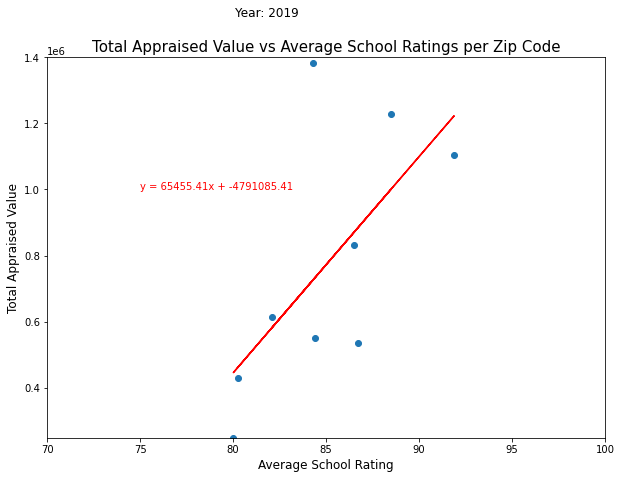

In [15]:
# plot average school ratings vs property values and add a linear regression
correlation = st.pearsonr(zip_code_group["Average School Rating"],zip_code_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(zip_code_group["Average School Rating"],
                                                           zip_code_group["TOTAL_APPRAISED_VALUE"])
regress_values = zip_code_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'r={round(correlation[0],2)}')
fig4,ax = plt.subplots(figsize=(10,7))
chart4 = ax.scatter(zip_code_group['Average School Rating'],zip_code_group["TOTAL_APPRAISED_VALUE"])
plt.plot(zip_code_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(zip_code_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Public Schools Inner Loop Subset

In [16]:
# slice the data for public schools
public_schools = data[["Elementary Public School Rating","Public Middle School Rating","Public High School Rating",
                       'TOTAL_APPRAISED_VALUE','Zip Code',"NEIGHBORHOOD_GROUP"]]
public_schools["Average School Rating"]=public_schools[["Elementary Public School Rating","Public Middle School Rating",
                                                  "Public High School Rating"]].mean(axis=1)

<ipython-input-16-f152cfb84cdd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  public_schools["Average School Rating"]=public_schools[["Elementary Public School Rating","Public Middle School Rating",


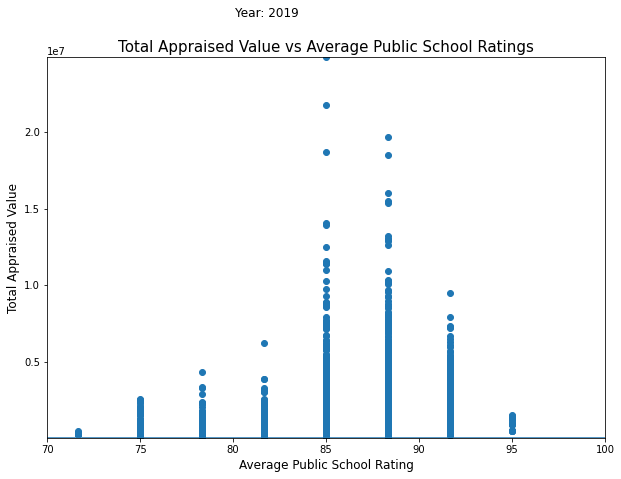

In [17]:
# plot average public school ratings vs property values
fig5,ax = plt.subplots(figsize=(10,7))
chart5 = ax.scatter(public_schools['Average School Rating'],public_schools["TOTAL_APPRAISED_VALUE"])
plt.plot(public_schools['Average School Rating'])
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_schools["TOTAL_APPRAISED_VALUE"].min(),public_schools["TOTAL_APPRAISED_VALUE"].max())
plt.show()

### Charter Schools Inner Loop Subset

In [18]:
# slice the data for charter_schools
charter_schools = data[["Elementary Charter School Rating","Charter Middle School Rating","Charter High School Rating",
                       'TOTAL_APPRAISED_VALUE','Zip Code',"NEIGHBORHOOD_GROUP"]]
charter_schools["Average School Rating"]=charter_schools[["Elementary Charter School Rating","Charter Middle School Rating",
                                                  "Charter High School Rating"]].mean(axis=1)

<ipython-input-18-19bd8a0fedae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charter_schools["Average School Rating"]=charter_schools[["Elementary Charter School Rating","Charter Middle School Rating",


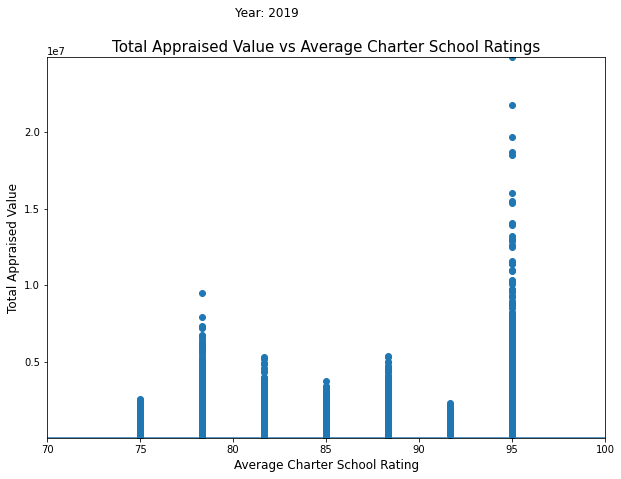

In [19]:
# plot average charter school ratings vs property values
fig6,ax = plt.subplots(figsize=(10,7))
chart6 = ax.scatter(charter_schools['Average School Rating'],public_schools["TOTAL_APPRAISED_VALUE"])
plt.plot(charter_schools['Average School Rating'])
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_schools["TOTAL_APPRAISED_VALUE"].min(),charter_schools["TOTAL_APPRAISED_VALUE"].max())
plt.show()

### Public Schools By Zip Codes

In [20]:
# group public schools by zip code
public_zip_code = public_schools[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE']]
public_schools_group = public_zip_code.groupby(["Zip Code"]).mean()
public_schools_group

,Average School Rating,TOTAL_APPRAISED_VALUE
Zip Code,,
77002,83.958333,4.297190e+05
77005,89.140419,1.227768e+06
77006,83.592655,6.134448e+05
77019,82.279241,1.382767e+06
77025,86.115787,5.355371e+05
77027,88.759046,1.105475e+06
77030,91.374107,8.322422e+05
77054,78.333333,2.486211e+05
77098,84.012346,5.519465e+05


r=0.47


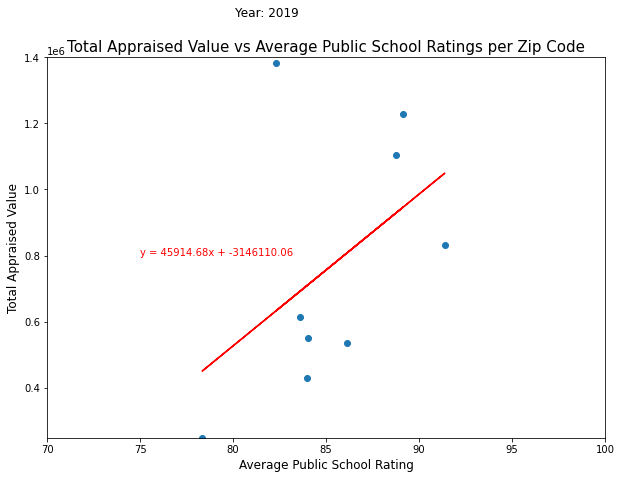

In [21]:
# plot average public school ratings vs property values per zip code and add a linear regression
correlation = st.pearsonr(public_schools_group["Average School Rating"],public_schools_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(public_schools_group["Average School Rating"],
                                                           public_schools_group["TOTAL_APPRAISED_VALUE"])
regress_values = public_schools_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'r={round(correlation[0],2)}')
fig7,ax = plt.subplots(figsize=(10,7))
chart7 = ax.scatter(public_schools_group['Average School Rating'],public_schools_group["TOTAL_APPRAISED_VALUE"])
plt.plot(public_schools_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,0.8e6),fontsize=10,color='red')
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_schools_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Charter Schools By Zip Codes

In [22]:
# group charter schools by zip code
charter_zip_code = charter_schools[['Zip Code',"Average School Rating",'TOTAL_APPRAISED_VALUE']]
charter_schools_group = charter_zip_code.groupby(["Zip Code"]).mean()
charter_schools_group

,Average School Rating,TOTAL_APPRAISED_VALUE
Zip Code,,
77002,76.510417,4.297190e+05
77005,87.816243,1.227768e+06
77006,80.549014,6.134448e+05
77019,86.289737,1.382767e+06
77025,87.298198,5.355371e+05
77027,95.000000,1.105475e+06
77030,81.666667,8.322422e+05
77054,81.681514,2.486211e+05
77098,84.825514,5.519465e+05


r=0.6


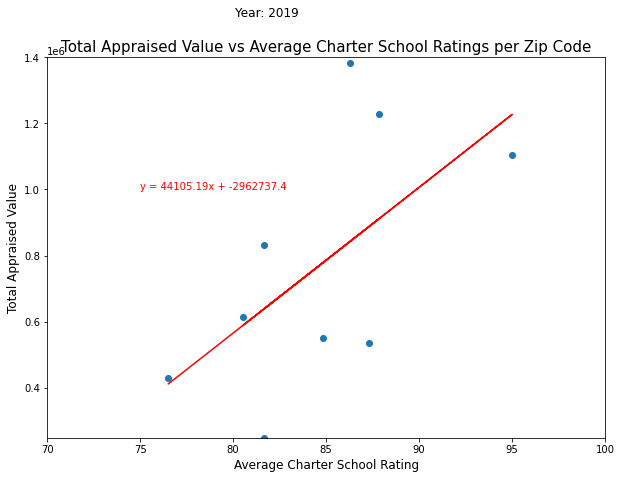

In [23]:
# plot average charter school ratings vs property values per zip code and add a linear regression
correlation = st.pearsonr(charter_schools_group["Average School Rating"],charter_schools_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(charter_schools_group["Average School Rating"],
                                                           charter_schools_group["TOTAL_APPRAISED_VALUE"])
regress_values = charter_schools_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'r={round(correlation[0],2)}')
fig8,ax = plt.subplots(figsize=(10,7))
chart8 = ax.scatter(charter_schools_group['Average School Rating'],charter_schools_group["TOTAL_APPRAISED_VALUE"])
plt.plot(charter_schools_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings per Zip Code", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_schools_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Schools By Neighborhood Group

In [24]:
# slice data by neighborhood group
neighborhood = data[['NEIGHBORHOOD_GROUP',"Average School Rating",'TOTAL_APPRAISED_VALUE']]
neighborhood_grouped = neighborhood.groupby(['NEIGHBORHOOD_GROUP']).mean()
neighborhood_grouped.head()

,Average School Rating,TOTAL_APPRAISED_VALUE
NEIGHBORHOOD_GROUP,,
0,81.666667,7.549200e+05
1200,84.787582,5.869866e+05
1201,83.405797,4.968702e+06
1202,82.337526,2.162001e+06
1203,83.513140,1.100338e+06


r=0.12


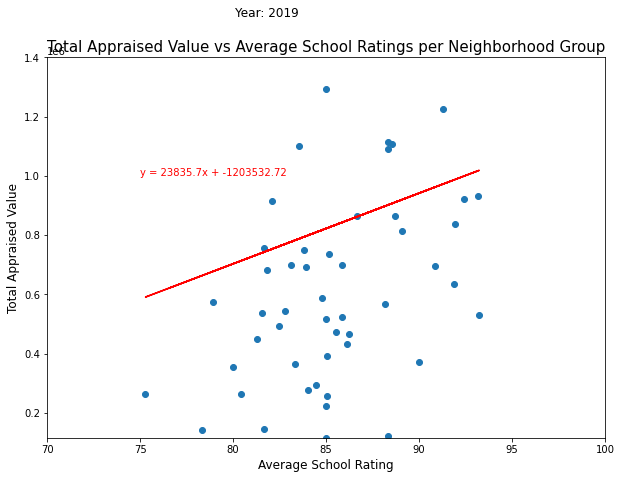

In [25]:
# plot average school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(neighborhood_grouped["Average School Rating"],neighborhood_grouped["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(neighborhood_grouped["Average School Rating"],
                                                           neighborhood_grouped["TOTAL_APPRAISED_VALUE"])
regress_values = neighborhood_grouped["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'r={round(correlation[0],2)}')
fig9,ax = plt.subplots(figsize=(10,7))
chart9 = ax.scatter(neighborhood_grouped['Average School Rating'],neighborhood_grouped["TOTAL_APPRAISED_VALUE"])
plt.plot(neighborhood_grouped['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.xlabel('Average School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(neighborhood_grouped["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Public Schools By Neighborhood Group

In [26]:
# group public schools by neighborhood group
public_neighborhood = public_schools[["NEIGHBORHOOD_GROUP","Average School Rating",'TOTAL_APPRAISED_VALUE']]
public_neighborhood_group = public_neighborhood.groupby(["NEIGHBORHOOD_GROUP"]).mean()

r=0.22


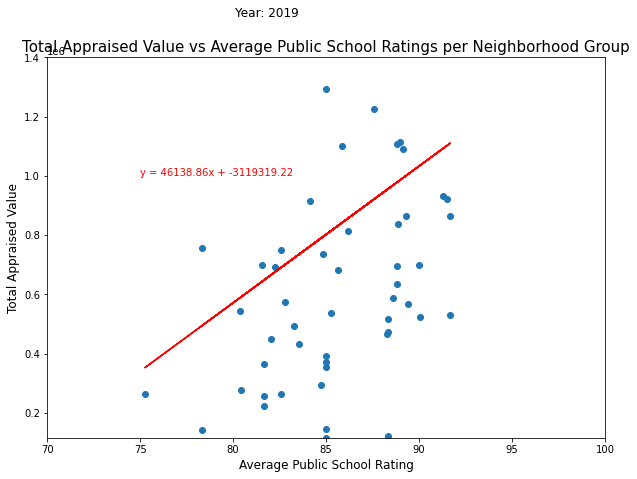

In [27]:
# plot average public school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(public_neighborhood_group["Average School Rating"],
                          public_neighborhood_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(public_neighborhood_group["Average School Rating"],
                                                           public_neighborhood_group["TOTAL_APPRAISED_VALUE"])
regress_values = public_neighborhood_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'r={round(correlation[0],2)}')
fig9,ax = plt.subplots(figsize=(10,7))
chart9 = ax.scatter(public_neighborhood_group['Average School Rating'],public_neighborhood_group["TOTAL_APPRAISED_VALUE"])
plt.plot(public_neighborhood_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.xlabel('Average Public School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Public School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(public_neighborhood_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()

### Charter Schools By Neighborhood Group

In [28]:
# group charter schools by neighborhood group
charter_neighborhood = charter_schools[["NEIGHBORHOOD_GROUP","Average School Rating",'TOTAL_APPRAISED_VALUE']]
charter_neighborhood_group = charter_neighborhood.groupby(["NEIGHBORHOOD_GROUP"]).mean()
charter_neighborhood_group.head()

,Average School Rating,TOTAL_APPRAISED_VALUE
NEIGHBORHOOD_GROUP,,
0,85.000000,7.549200e+05
1200,80.969499,5.869866e+05
1201,78.333333,4.968702e+06
1202,78.731656,2.162001e+06
1203,81.203320,1.100338e+06


r=0.03


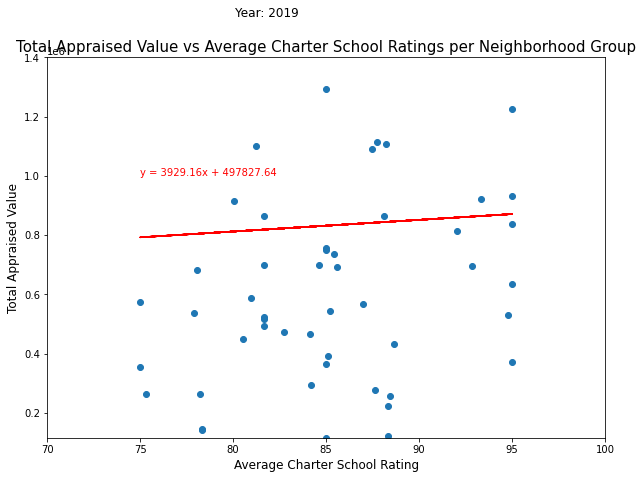

<Figure size 432x288 with 0 Axes>

In [29]:
# plot average charter school ratings vs property values per neighborhood grooup and add a linear regression
correlation = st.pearsonr(charter_neighborhood_group["Average School Rating"],
                          charter_neighborhood_group["TOTAL_APPRAISED_VALUE"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(charter_neighborhood_group["Average School Rating"],
                                                           charter_neighborhood_group["TOTAL_APPRAISED_VALUE"])
regress_values = charter_neighborhood_group["Average School Rating"] * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
print(f'r={round(correlation[0],2)}')
fig9,ax = plt.subplots(figsize=(10,7))
chart9 = ax.scatter(charter_neighborhood_group['Average School Rating'],charter_neighborhood_group["TOTAL_APPRAISED_VALUE"])
plt.plot(charter_neighborhood_group['Average School Rating'], regress_values, "r-")
plt.annotate(line_eq, (75,1e6),fontsize=10,color='red')
plt.xlabel('Average Charter School Rating', fontsize=12)
plt.ylabel("Total Appraised Value", fontsize=12)
plt.title("Total Appraised Value vs Average Charter School Ratings per Neighborhood Group", fontsize=15)
plt.suptitle("Year: 2019",x=0.43,fontsize=12)
plt.xlim(70,100)
plt.ylim(charter_neighborhood_group["TOTAL_APPRAISED_VALUE"].min(),1.4e6)
plt.show()
plt.savefig("Output/appraised_value_vs_charter_school_ratings.png")

##  Remove Charter Schools From the Final Data

In [30]:
# create a dataset without charter schools
only_public_schools = data.drop(['Elementary Charter School ID','Elementary Charter School Name',
                                 'Elementary Charter School Rating','Charter Middle School ID',
                                 'Charter Middle School Name', 'Charter Middle School Rating',
                                 'Charter High School ID','Charter High School Name',
                                 'Charter High School Rating'], axis=1)

value_2019 = only_public_schools['TOTAL_APPRAISED_VALUE_2019']
value_2018 = only_public_schools['TOTAL_APPRAISED_VALUE_2018']

only_public_schools["pct_change"] = (value_2019-value_2018)/value_2018*100

only_public_schools.to_csv("Output/combined_data_without_charter_schools.csv")

In [31]:
# add column to track sale activity in the year 2019
only_public_schools["Sale Year"] = only_public_schools["NEW_OWNER_DATE"].str.split('-').str[0]
only_public_schools['2019 Sales']=np.where(only_public_schools['Sale Year']=='2019',1,0)
only_public_schools.head()

,Unnamed: 0_x,Unnamed: 0.1,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,...,change_assessed_value_2018_2019,change_total_appraised_value_2018_2019,change_total_market_value_2018_2019,pct_change_land_value_2018_2019,pct_change_assessed_value_2018_2019,pct_change_total_appraised_value_2018_2019,pct_change_total_market_value_2018_2019,pct_change,Sale Year,2019 Sales
0,0,0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,3,2202 CAROLINE ST,21750000003,...,0.0,0.0,0.0,88856.0,298900.0,298900.0,298900.0,0.000000,2009,0
1,1,1,"2218 CAROLINE ST HOUSTON, Texas 77002",29.74605,-95.37014,AREA OF MINIMAL FLOOD HAZARD,X,3,2218 CAROLINE ST,21750000013,...,0.0,0.0,0.0,674900.0,814900.0,814900.0,814900.0,0.000000,1995,0
2,2,2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,3,2204 CAROLINE ST,21750000018,...,0.0,0.0,0.0,84437.0,296300.0,296300.0,296300.0,0.000000,2018,0
3,3,3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,3,2206 CAROLINE ST,21750000019,...,0.0,0.0,0.0,88136.0,299703.0,299703.0,299703.0,0.000000,2001,0
4,4,4,"1114 CHAPMAN ST HOUSTON, Texas 77002",29.77044,-95.35299,AREA OF MINIMAL FLOOD HAZARD,X,3,1114 CHAPMAN ST,91190000006,...,8073.0,8073.0,8073.0,105247.0,142407.0,142407.0,142407.0,6.005177,2018,0


In [32]:
# set up data for correlation matrix
correlation_data = only_public_schools[['Flood Risk','TOTAL_BUILDING_AREA_x','ACREAGE_x','TOTAL_APPRAISED_VALUE',
                                        'crime_rank','Average School Rating','pct_change','2019 Sales']]
correlation_data.head()

,Flood Risk,TOTAL_BUILDING_AREA_x,ACREAGE_x,TOTAL_APPRAISED_VALUE,crime_rank,Average School Rating,pct_change,2019 Sales
0,3,1944,0.0405,299000.0,1.0,80.000000,0.000000,0
1,3,2471,0.3099,815000.0,1.0,81.666667,0.000000,0
2,3,1944,0.0348,296400.0,1.0,80.000000,0.000000,0
3,3,1944,0.0395,299803.0,1.0,80.000000,0.000000,0
4,3,1444,0.1156,142507.0,1.0,78.333333,6.005177,0


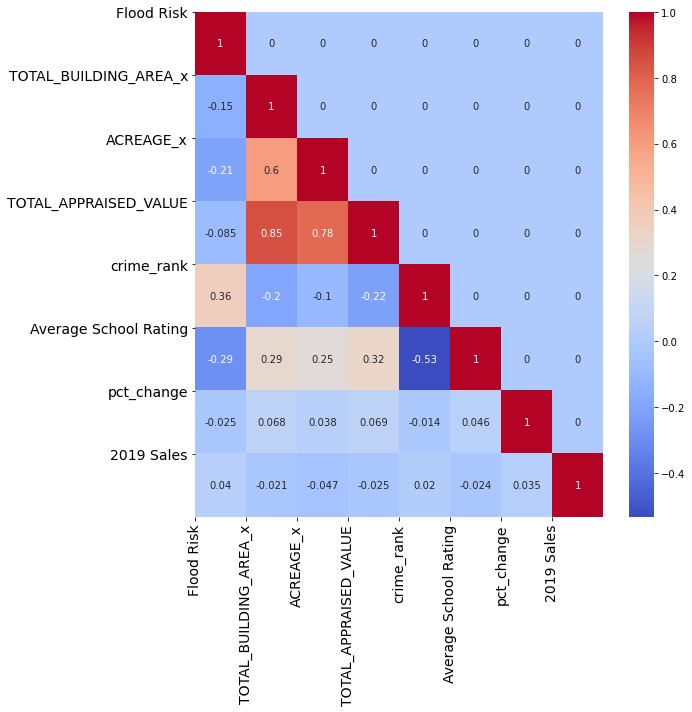

In [33]:
# create a correlation matrix
corr = correlation_data.corr()
corr = corr.unstack().sort_values()
corr = corr.unstack()
corr2=np.tril(corr, k=0)
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr2,cmap="coolwarm",annot=True)
mask = np.triu(np.ones_like(corr2, dtype=np.bool))
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=90)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=0)
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
plt.tight_layout()
plt.savefig("Output/correlation_matrix.png")

## Remove Homes Valued At More Than $1M

In [34]:
homes_less_than_1M = only_public_schools.loc[only_public_schools['TOTAL_APPRAISED_VALUE']<=1000000,:]
homes_less_than_1M["TOTAL_APPRAISED_VALUE"].max()

1000000.0

In [35]:
neighborhoods=pd.read_csv("Resources/neighborhood_code.csv")
neighborhoods=neighborhoods.rename(columns={'neighborhood_code':'NEIGHBORHOOD_CODE',\
                                            'group_code':'NEIGHBORHOOD_GROUP',\
                                            'description':'neighborhood'})
only_public_schools = pd.merge(only_public_schools,neighborhoods,on=['NEIGHBORHOOD_CODE','NEIGHBORHOOD_GROUP'])
only_public_schools.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26406 entries, 0 to 26405
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0_x                                26406 non-null  int64  
 1   Unnamed: 0.1                                26406 non-null  int64  
 2   Address                                     26406 non-null  object 
 3   Latitude                                    26406 non-null  float64
 4   Longitude                                   26406 non-null  float64
 5   Flood Description                           21794 non-null  object 
 6   Flood Zone                                  26406 non-null  object 
 7   Flood Risk                                  26406 non-null  int64  
 8   SITE_ADDR_1                                 26406 non-null  object 
 9   ACCOUNT                                     26406 non-null  int64  
 10  TAX_YEAR  

In [36]:
# del only_public_schools['Unnamed: 0']
# del only_public_schools['Unnamed: 0_x']
# del only_public_schools['Unnamed: 0.1']
# del only_public_schools['Unnamed: 0_y']

only_public_schools.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 26406 entries, 0 to 26405
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0_x                                26406 non-null  int64  
 1   Unnamed: 0.1                                26406 non-null  int64  
 2   Address                                     26406 non-null  object 
 3   Latitude                                    26406 non-null  float64
 4   Longitude                                   26406 non-null  float64
 5   Flood Description                           21794 non-null  object 
 6   Flood Zone                                  26406 non-null  object 
 7   Flood Risk                                  26406 non-null  int64  
 8   SITE_ADDR_1                                 26406 non-null  object 
 9   ACCOUNT                                     26406 non-null  int64  
 10  TAX_YEAR  

In [37]:
# Calculate sales per neighborhood
sales=only_public_schools.groupby('neighborhood')['2019 Sales'].sum()
sales=pd.DataFrame(sales)
sales=sales.reset_index()
min=sales['2019 Sales'].min()
max=sales['2019 Sales'].max()
sales['Sales Index']=(sales['2019 Sales']-min)/(max-min)



In [38]:
# Merge sales count and index with maindataframe
only_public_schools=pd.merge(only_public_schools,sales,on="neighborhood")

In [39]:
pd.set_option('display.max_columns', 100)
only_public_schools.head(20)

,Unnamed: 0_x,Unnamed: 0.1,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,TAX_YEAR,SITE_ADDR_2,Zip Code,STATE_CLASS,SCHOOL_DIST,NEIGHBORHOOD_CODE,NEIGHBORHOOD_GROUP,MARKET_AREA_1_DSCR,MARKET_AREA_2_DSCR,TOTAL_BUILDING_AREA_x,TOTAL_LAND_AREA_x,ACREAGE_x,LAND_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,LAST_INSPECTED_DATE,NEW_OWNER_DATE,Offense Count,crime_rank,Elementary Public School ID,Elementary Public School Name,Elementary Public School Rating,Public Middle School ID,Public Middle School Name,Public Middle School Rating,Public High School ID,Public High School Name,Public High School Rating,Average School Rating,Unnamed: 0_y,TOTAL_BUILDING_AREA_y,TOTAL_LAND_AREA_y,ACREAGE_y,LAND_VALUE_2019,ASSESSED_VALUE_2019,TOTAL_APPRAISED_VALUE_2019,TOTAL_MARKET_VALUE_2019,LAND_VALUE_2018,ASSESSED_VALUE_2018,TOTAL_APPRAISED_VALUE_2018,TOTAL_MARKET_VALUE_2018,change_land_value_2018_2019,change_assessed_value_2018_2019,change_total_appraised_value_2018_2019,change_total_market_value_2018_2019,pct_change_land_value_2018_2019,pct_change_assessed_value_2018_2019,pct_change_total_appraised_value_2018_2019,pct_change_total_market_value_2018_2019,pct_change,Sale Year,2019 Sales_x,Unnamed: 0,neighborhood,2019 Sales_y,Sales Index
0,0,0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,3,2202 CAROLINE ST,21750000003,2019,HOUSTON,77002,A1,1,8400.07,1322,"1C Midtown, Riverside Terrace, University Areas","1C Midtown, Riverside Terrace, University Areas",1944,1765,0.0405,88956.0,299000.0,299000.0,299000.0,2013-12-09 09:48:52.977,2009-10-13 00:00:00.000,4870,1.000000,101912110,BLACKSHEAR ELEMENTARY,75,101912467,BAYLOR COLLEGE OF MEDICINE ACADEMY MIDDLE,85,101912025,KINDER HIGH FOR PERFORMING AND VISU,95,80.000000,8,1944.0,1765.0,0.0405,88956.0,299000.0,299000.0,299000.0,88956.0,299000.0,299000.0,299000.0,0.0,0.0,0.0,0.0,88856.0,298900.0,298900.0,298900.0,0.000000,2009,0,11494,BALDWIN SQ/TUAM SQ/MCGREGOR,0,0.000000
1,2,2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,3,2204 CAROLINE ST,21750000018,2019,HOUSTON,77002,A1,1,8400.07,1322,"1C Midtown, Riverside Terrace, University Areas","1C Midtown, Riverside Terrace, University Areas",1944,1515,0.0348,84537.0,296400.0,296400.0,296400.0,2013-12-09 08:42:23.417,2018-06-29 00:00:00.000,4870,1.000000,101912110,BLACKSHEAR ELEMENTARY,75,101912467,BAYLOR COLLEGE OF MEDICINE ACADEMY MIDDLE,85,101912025,KINDER HIGH FOR PERFORMING AND VISU,95,80.000000,10,1944.0,1515.0,0.0348,84537.0,296400.0,296400.0,296400.0,84537.0,296400.0,296400.0,296400.0,0.0,0.0,0.0,0.0,84437.0,296300.0,296300.0,296300.0,0.000000,2018,0,11494,BALDWIN SQ/TUAM SQ/MCGREGOR,0,0.000000
2,3,3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,3,2206 CAROLINE ST,21750000019,2019,HOUSTON,77002,A1,1,8400.07,1322,"1C Midtown, Riverside Terrace, University Areas","1C Midtown, Riverside Terrace, University Areas",1944,1720,0.0395,88236.0,299803.0,299803.0,299803.0,2013-12-09 08:37:01.483,2001-01-01 00:00:00.000,4870,1.000000,101912058,GREGORY-LINCOLN EDUCATIONAL CENTER MIDDLE,65,101912463,YOUNG WOMEN'S COLLEGE PREP ACADEMY MIDDLE,95,101912025,KINDER HIGH FOR PERFORMING AND VISU,95,80.000000,11,1944.0,1720.0,0.0395,88236.0,299803.0,299803.0,299803.0,88236.0,299803.0,299803.0,299803.0,0.0,0.0,0.0,0.0,88136.0,299703.0,299703.0,299703.0,0.000000,2001,0,11494,BALDWIN SQ/TUAM SQ/MCGREGOR,0,0.000000
3,10250,10250,"826 STUART ST HOUSTON, Texas 77006",29.74130,-95.37883,AREA OF MINIMAL FLOOD HAZARD,X,3,826 STUART ST,1225110010001,2019,HOUSTON,77006,A1,1,8400.07,1322,"1C Midtown, Riverside Terrace, University Areas","1C Midtown, Riverside Terrace, University Areas",2550,1837,0.0422,89278.0,385000.0,385000.0,385000.0,2014-11-24 12:58:33.163,2004-02-26 00:00:00.000,3759,0.710978,101912058,GREGORY-LINCOLN EDUCATIONAL CENTER MIDDLE,65,101912463,YOUNG WOMEN'S COLLEGE PREP ACADEMY MIDDLE,95,10

In [40]:
# normalize data for each parameter
max=only_public_schools['Offense Count'].max()
min=only_public_schools['Offense Count'].min()
only_public_schools["Low Crime Index"]=1-(only_public_schools['Offense Count']-min)/(max-min)

max=only_public_schools['Average School Rating'].max()
min=only_public_schools['Average School Rating'].min()
only_public_schools["School Rating Index"]=(only_public_schools['Average School Rating']-min)/(max-min)

max=only_public_schools['ACREAGE_x'].max()
min=only_public_schools['ACREAGE_x'].min()
only_public_schools["Acreage Index"]=(only_public_schools['ACREAGE_x']-min)/(max-min)

max=only_public_schools['TOTAL_BUILDING_AREA_x'].max()
min=only_public_schools['TOTAL_BUILDING_AREA_x'].min()
only_public_schools["Building Area Index"]=(only_public_schools['TOTAL_BUILDING_AREA_x']-min)/(max-min)

max=only_public_schools['Flood Risk'].max()
min=only_public_schools['Flood Risk'].min()
only_public_schools["Flood Risk Index"]=(only_public_schools['Flood Risk']-min)/(max-min)


max=only_public_schools['pct_change'].max()
min=only_public_schools['pct_change'].min()
#change = only_public_schools['pct_change']
only_public_schools['Valuation Index']=only_public_schools['pct_change']/max
print(min)
print(max)
only_public_schools.sample(5)

-43.1743966369312
266.7432193575913


,Unnamed: 0_x,Unnamed: 0.1,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,TAX_YEAR,SITE_ADDR_2,Zip Code,STATE_CLASS,SCHOOL_DIST,NEIGHBORHOOD_CODE,NEIGHBORHOOD_GROUP,MARKET_AREA_1_DSCR,MARKET_AREA_2_DSCR,TOTAL_BUILDING_AREA_x,TOTAL_LAND_AREA_x,ACREAGE_x,LAND_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,LAST_INSPECTED_DATE,NEW_OWNER_DATE,Offense Count,crime_rank,Elementary Public School ID,Elementary Public School Name,Elementary Public School Rating,Public Middle School ID,Public Middle School Name,Public Middle School Rating,Public High School ID,Public High School Name,Public High School Rating,Average School Rating,Unnamed: 0_y,TOTAL_BUILDING_AREA_y,TOTAL_LAND_AREA_y,ACREAGE_y,LAND_VALUE_2019,ASSESSED_VALUE_2019,TOTAL_APPRAISED_VALUE_2019,TOTAL_MARKET_VALUE_2019,LAND_VALUE_2018,ASSESSED_VALUE_2018,TOTAL_APPRAISED_VALUE_2018,TOTAL_MARKET_VALUE_2018,change_land_value_2018_2019,change_assessed_value_2018_2019,change_total_appraised_value_2018_2019,change_total_market_value_2018_2019,pct_change_land_value_2018_2019,pct_change_assessed_value_2018_2019,pct_change_total_appraised_value_2018_2019,pct_change_total_market_value_2018_2019,pct_change,Sale Year,2019 Sales_x,Unnamed: 0,neighborhood,2019 Sales_y,Sales Index,Low Crime Index,School Rating Index,Acreage Index,Building Area Index,Flood Risk Index,Valuation Index
19730,18264,18264,"4123 MISCHIRE DR HOUSTON, Texas 77025",29.68221,-95.44478,NaN,AE,1,4123 MISCHIRE DR,904750000006,2019,HOUSTON,77025,A1,1,7453.00,1226,"1B Linkwood, Willow Meadows, Knollwood Vlg Areas","1B Linkwood, Willow Meadows, Knollwood Vlg Areas",2281,8475,0.1946,255053.0,311057.0,311057.0,311057.0,2011-11-28 12:16:25.513,1995-11-14 00:00:00.000,2270,0.323621,101912239,SHEARN ELEMENTARY,75,101912064,PERSHING MIDDLE,85,101912002,BELLAIRE HIGH,85,86.666667,82312,2281.0,8475.0,0.1946,255053.0,311057.0,311057.0,311057.0,312645.0,338881.0,338881.0,338881.0,-57592.0,-27824.0,-27824.0,-27824.0,254953.0,310957.0,310957.0,310957.0,-8.210552,1995,0,9804,WOODSHIRE,13,0.035040,0.676379,0.636364,0.028787,0.075733,0.0,-0.030781
24739,24546,24546,"2901 BAMMEL LN HOUSTON, Texas 77098",29.73948,-95.42326,AREA OF MINIMAL FLOOD HAZARD,X,3,2901 BAMMEL LN,1141800110001,2019,HOUSTON,77098,A1,1,8332.09,1615,"1F Afton Oaks, Highland Village, Weslayan Areas","1F Afton Oaks, Highland Village, Weslayan Areas",1700,0,0.0000,125000.0,406673.0,406673.0,406673.0,2002-09-12 00:00:00.000,2019-12-06 00:00:00.000,2051,0.266649,101912228,RIVER OAKS ELEMENTARY,95,101912259,WILSON MONTESSORI MIDDLE,75,101912008,LAMAR HIGH,85,85.000000,83650,1700.0,0.0,0.0000,125000.0,406673.0,406673.0,406673.0,125000.0,387482.0,387482.0,387482.0,0.0,19191.0,19191.0,19191.0,124900.0,406573.0,406573.0,406573.0,4.952746,2019,1,11456,RIVER OAKS SQUARE,371,1.000000,0.733351,0.545455,0.000000,0.056443,1.0,0.018567
11712,13938,13938,"1905 MCDUFFIE ST HOUSTON, Texas 77019",29.74883,-95.40770,AREA OF MINIMAL FLOOD HAZARD,X,3,1905 MCDUFFIE ST,1336590010001,2019,HOUSTON,77019,A1,1,8316.05,1628,"1F Montrose, Fourth Ward Areas","1F Montrose, Fourth Ward Areas",3354,3400,0.0781,186000.0,733000.0,733000.0,733000.0,2013-12-16 10:01:32.497,2013-03-04 00:00:00.000,2330,0.339230,101912259,WILSON MONTESSORI MIDDLE,75,101912259,WILSON MONTESSORI MIDDLE,75,101912008,LAMAR HIGH,85,81.666667,97672,3354.0,3400.0,0.0781,186000.0,733000.0,733000.0,733000.0,186000.0,718000.0,718000.0,718000.0,0.0,15000.0,15000.0,15000.0,185900.0,732900.0,732900.0,732900.0,2.089136,2013,0,11402,HYDE PARK MAIN 6-ROW T/H,90,0.242588,0.660770,0.363636,0.011553,0.111358,1.0,0.007832
25849,25656,25656,"2901 BAMMEL LN HOUSTON, Texas 77098",29.73948,-95.42326,AREA OF MINIMAL FLOOD HAZARD,X,3,2901 BAMMEL LN,1141800130003,2019,HOUSTON,77098,A1,1,8332.09,1615,"1F Afton Oaks, Highland Village, Weslayan Areas","1F Afton Oaks, Highland Village, Weslayan Areas",1617,0,0.0000,125000.0,372645.0,372645.0,372645.0,2002-09-12 00:00:00.000,2019-09-30 00:00:00.000,2051,0.266

In [41]:
# calculate scores for each address
w_sales=.30
w_crime=.05
w_schools=.08
w_acreage=.5
w_building=.05
w_flood=.07
w_change=.50


only_public_schools["Sales Index_W"]=w_sales*only_public_schools['Sales Index']
only_public_schools['Low Crime Index_W']= w_crime*only_public_schools['Low Crime Index']
only_public_schools["School Rating Index_W"]=w_schools*only_public_schools['School Rating Index']
only_public_schools["Acreage Index_W"]= w_acreage*only_public_schools['Acreage Index']
only_public_schools["Building Area Index_W"]= w_building*only_public_schools['Building Area Index']
only_public_schools["Flood Risk Index_W"]=w_flood*only_public_schools['Flood Risk Index']
only_public_schools['Valuation Index_W']= w_change*only_public_schools['Valuation Index']

only_public_schools["Score"]=round((w_sales*only_public_schools['Sales Index']+
                                   w_crime*only_public_schools['Low Crime Index']+
                                   w_schools*only_public_schools['School Rating Index']+
                                   w_acreage*only_public_schools['Acreage Index']+
                                   w_building*only_public_schools['Building Area Index']+
                                   w_flood*only_public_schools['Flood Risk Index']+
                                   w_change*only_public_schools['Valuation Index'])/7,2)
only_public_schools.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'Address', 'Latitude', 'Longitude',
       'Flood Description', 'Flood Zone', 'Flood Risk', 'SITE_ADDR_1',
       'ACCOUNT', 'TAX_YEAR', 'SITE_ADDR_2', 'Zip Code', 'STATE_CLASS',
       'SCHOOL_DIST', 'NEIGHBORHOOD_CODE', 'NEIGHBORHOOD_GROUP',
       'MARKET_AREA_1_DSCR', 'MARKET_AREA_2_DSCR', 'TOTAL_BUILDING_AREA_x',
       'TOTAL_LAND_AREA_x', 'ACREAGE_x', 'LAND_VALUE', 'ASSESSED_VALUE',
       'TOTAL_APPRAISED_VALUE', 'TOTAL_MARKET_VALUE', 'LAST_INSPECTED_DATE',
       'NEW_OWNER_DATE', 'Offense Count', 'crime_rank',
       'Elementary Public School ID', 'Elementary Public School Name',
       'Elementary Public School Rating', 'Public Middle School ID',
       'Public Middle School Name', 'Public Middle School Rating',
       'Public High School ID', 'Public High School Name',
       'Public High School Rating', 'Average School Rating', 'Unnamed: 0_y',
       'TOTAL_BUILDING_AREA_y', 'TOTAL_LAND_AREA_y', 'ACREAGE_y',
       'LAND_VALUE_2019', 

In [42]:
# pull in neighborhood names and merge with dataframe
neighborhoods=pd.read_csv("Resources/neighborhood_code.csv")
neighborhoods=neighborhoods.rename(columns={'neighborhood_code':'NEIGHBORHOOD_CODE',\
                                            'group_code':'NEIGHBORHOOD_GROUP',\
                                            'description':'neighborhood'})
only_public_schools = pd.merge(only_public_schools,neighborhoods,on=['NEIGHBORHOOD_CODE','NEIGHBORHOOD_GROUP'])
only_public_schools.head()

,Unnamed: 0_x,Unnamed: 0.1,Address,Latitude,Longitude,Flood Description,Flood Zone,Flood Risk,SITE_ADDR_1,ACCOUNT,TAX_YEAR,SITE_ADDR_2,Zip Code,STATE_CLASS,SCHOOL_DIST,NEIGHBORHOOD_CODE,NEIGHBORHOOD_GROUP,MARKET_AREA_1_DSCR,MARKET_AREA_2_DSCR,TOTAL_BUILDING_AREA_x,TOTAL_LAND_AREA_x,ACREAGE_x,LAND_VALUE,ASSESSED_VALUE,TOTAL_APPRAISED_VALUE,TOTAL_MARKET_VALUE,LAST_INSPECTED_DATE,NEW_OWNER_DATE,Offense Count,crime_rank,Elementary Public School ID,Elementary Public School Name,Elementary Public School Rating,Public Middle School ID,Public Middle School Name,Public Middle School Rating,Public High School ID,Public High School Name,Public High School Rating,Average School Rating,Unnamed: 0_y,TOTAL_BUILDING_AREA_y,TOTAL_LAND_AREA_y,ACREAGE_y,LAND_VALUE_2019,ASSESSED_VALUE_2019,TOTAL_APPRAISED_VALUE_2019,TOTAL_MARKET_VALUE_2019,LAND_VALUE_2018,ASSESSED_VALUE_2018,TOTAL_APPRAISED_VALUE_2018,TOTAL_MARKET_VALUE_2018,change_land_value_2018_2019,change_assessed_value_2018_2019,change_total_appraised_value_2018_2019,change_total_market_value_2018_2019,pct_change_land_value_2018_2019,pct_change_assessed_value_2018_2019,pct_change_total_appraised_value_2018_2019,pct_change_total_market_value_2018_2019,pct_change,Sale Year,2019 Sales_x,Unnamed: 0_x,neighborhood_x,2019 Sales_y,Sales Index,Low Crime Index,School Rating Index,Acreage Index,Building Area Index,Flood Risk Index,Valuation Index,Sales Index_W,Low Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Flood Risk Index_W,Valuation Index_W,Score,Unnamed: 0_y,neighborhood_y
0,0,0,"2202 CAROLINE ST HOUSTON, Texas 77002",29.74614,-95.36987,AREA OF MINIMAL FLOOD HAZARD,X,3,2202 CAROLINE ST,21750000003,2019,HOUSTON,77002,A1,1,8400.07,1322,"1C Midtown, Riverside Terrace, University Areas","1C Midtown, Riverside Terrace, University Areas",1944,1765,0.0405,88956.0,299000.0,299000.0,299000.0,2013-12-09 09:48:52.977,2009-10-13 00:00:00.000,4870,1.000000,101912110,BLACKSHEAR ELEMENTARY,75,101912467,BAYLOR COLLEGE OF MEDICINE ACADEMY MIDDLE,85,101912025,KINDER HIGH FOR PERFORMING AND VISU,95,80.0,8,1944.0,1765.0,0.0405,88956.0,299000.0,299000.0,299000.0,88956.0,299000.0,299000.0,299000.0,0.0,0.0,0.0,0.0,88856.0,298900.0,298900.0,298900.0,0.000000,2009,0,11494,BALDWIN SQ/TUAM SQ/MCGREGOR,0,0.0,0.000000,0.272727,0.005991,0.064544,1.0,0.000000,0.0,0.000000,0.021818,0.002996,0.003227,0.07,0.000000,0.01,11494,BALDWIN SQ/TUAM SQ/MCGREGOR
1,2,2,"2204 CAROLINE ST HOUSTON, Texas 77002",29.74619,-95.36996,AREA OF MINIMAL FLOOD HAZARD,X,3,2204 CAROLINE ST,21750000018,2019,HOUSTON,77002,A1,1,8400.07,1322,"1C Midtown, Riverside Terrace, University Areas","1C Midtown, Riverside Terrace, University Areas",1944,1515,0.0348,84537.0,296400.0,296400.0,296400.0,2013-12-09 08:42:23.417,2018-06-29 00:00:00.000,4870,1.000000,101912110,BLACKSHEAR ELEMENTARY,75,101912467,BAYLOR COLLEGE OF MEDICINE ACADEMY MIDDLE,85,101912025,KINDER HIGH FOR PERFORMING AND VISU,95,80.0,10,1944.0,1515.0,0.0348,84537.0,296400.0,296400.0,296400.0,84537.0,296400.0,296400.0,296400.0,0.0,0.0,0.0,0.0,84437.0,296300.0,296300.0,296300.0,0.000000,2018,0,11494,BALDWIN SQ/TUAM SQ/MCGREGOR,0,0.0,0.000000,0.272727,0.005148,0.064544,1.0,0.000000,0.0,0.000000,0.021818,0.002574,0.003227,0.07,0.000000,0.01,11494,BALDWIN SQ/TUAM SQ/MCGREGOR
2,3,3,"2206 CAROLINE ST HOUSTON, Texas 77002",29.74624,-95.37004,AREA OF MINIMAL FLOOD HAZARD,X,3,2206 CAROLINE ST,21750000019,2019,HOUSTON,77002,A1,1,8400.07,1322,"1C Midtown, Riverside Terrace, University Areas","1C Midtown, Riverside Terrace, University Areas",1944,1720,0.0395,88236.0,299803.0,299803.0,299803.0,2013-12-09 08:37:01.483,2001-01-01 00:00:00.000,4870,1.000000,101912058,GREGORY-LINCOLN EDUCATIONAL CENTER MIDDLE,65,101912463,YOUNG WOMEN'S COLLEGE PREP ACADEMY MIDDLE,95,101912025,KINDER HIGH FOR PERFORMING AND VISU,95,80.0,11,1944.0,1720.0,0.0395,88236.0,299803.0,299803.0,299803.0,88236.0,299803.0,299803.0,299803.0,0.0,0.0,0.0,0.0,88136.0,299703.0,299703.0,299703.0,0.000000,2001,0,11494,BALD

In [43]:
# look at only the parameters of interest
parameter_and_score = only_public_schools.iloc[:,-10:]
# del parameter_and_score["Flood Risk Index"]
del parameter_and_score["Unnamed: 0_y"]
# del parameter_and_score["Valuation Index"]
parameter_and_score["Total Appraised Value"] = only_public_schools['TOTAL_APPRAISED_VALUE']
parameter_and_score.rename(columns={'neighborhood_y':'Neighborhood'}, inplace = True)
parameter_and_score.head()

,Sales Index_W,Low Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Flood Risk Index_W,Valuation Index_W,Score,Neighborhood,Total Appraised Value
0,0.0,0.000000,0.021818,0.002996,0.003227,0.07,0.000000,0.01,BALDWIN SQ/TUAM SQ/MCGREGOR,299000.0
1,0.0,0.000000,0.021818,0.002574,0.003227,0.07,0.000000,0.01,BALDWIN SQ/TUAM SQ/MCGREGOR,296400.0
2,0.0,0.000000,0.021818,0.002922,0.003227,0.07,0.000000,0.01,BALDWIN SQ/TUAM SQ/MCGREGOR,299803.0
3,0.0,0.014451,0.021818,0.003121,0.004233,0.07,0.000000,0.02,BALDWIN SQ/TUAM SQ/MCGREGOR,385000.0
4,0.0,0.014451,0.021818,0.003062,0.004233,0.07,-0.036124,0.01,BALDWIN SQ/TUAM SQ/MCGREGOR,367939.0


In [44]:
# group parameters by neighborhood name
neighborhood_group = parameter_and_score.groupby(["Neighborhood"]).mean()
neighborhood_group

,Sales Index_W,Low Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
Neighborhood,,,,,,,,,
2300 STEEL STREET,0.000000,0.036668,0.043636,0.008268,0.003771,0.070000,NaN,NaN,5.269747e+05
3818-3822 BUTE,0.000000,0.014451,0.042727,0.000000,0.003869,0.070000,0.002734,0.020000,3.432842e+05
AFTON OAKS,0.018598,0.037149,0.071118,0.016939,0.006121,0.070000,0.011492,0.031185,1.226759e+06
AFTON OAKS (S. OF RICHMOND),0.007278,0.037149,0.073775,0.014801,0.004045,0.070000,0.007592,0.030427,6.434614e+05
ALABAMA COURTS PLACE,0.001617,0.037149,0.080000,0.008071,0.005700,0.070000,0.007561,0.029474,6.576791e+05
...,...,...,...,...,...,...,...,...,...
WOODSHIRE,0.010512,0.033819,0.045701,0.014890,0.004262,0.000000,-0.007468,0.013256,4.092492e+05
WOODSIDE,0.021833,0.033819,0.048836,0.015230,0.003867,0.018550,0.007656,0.021228,4.308080e+05
WOODWIND ESTATES,0.003235,0.033819,0.043636,0.003085,0.004143,0.070000,-0.004028,0.019444,3.601963e+05


In [45]:
# sort scores
rank_all = neighborhood_group.sort_values('Score',ascending=False)
rank_all

,Sales Index_W,Low Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
Neighborhood,,,,,,,,,
RIVER OAKS SQUARE,0.300000,0.036668,0.043636,0.000000,0.002781,0.070000,0.003902,0.065000,3.945608e+05
"R.O. GOLF COURSE, BLVD, HOMEWOODS, BRIARWOOD",0.000809,0.033039,0.067013,0.146314,0.021944,0.070000,0.006416,0.049286,1.112812e+07
RIVER OAKS TALL TIMBERS & PT SEC 10,0.003235,0.033039,0.072727,0.111210,0.016406,0.045794,0.006223,0.041604,6.493640e+06
SHADYSIDE,0.000809,0.050000,0.043636,0.106094,0.015703,0.066667,0.004141,0.040476,5.642180e+06
RIVER OAKS PT CCE AND OTHERS,0.005660,0.033039,0.069579,0.047241,0.012716,0.070000,0.019649,0.037612,5.264631e+06
...,...,...,...,...,...,...,...,...,...
PARK AT CLEARVIEW & AMENDING NO 1,0.006469,0.033819,0.036364,0.003710,0.002891,0.070000,NaN,NaN,2.572671e+05
RIVER OAKS COURT (RES A),0.000000,0.037149,0.065455,0.003760,0.004243,0.070000,NaN,NaN,5.210648e+05
RO. CT. GARDEN HOMES,0.000809,0.037149,0.065455,0.006470,0.004946,0.070000,NaN,NaN,6.787380e+05


In [46]:
# extract the top five neighborhoods for home values 0-250k
top_neighborhoods_250 = parameter_and_score.loc[parameter_and_score['Total Appraised Value']<=250000,:]
top_250k_group = top_neighborhoods_250.groupby(['Neighborhood']).mean()
ranked_250k = top_250k_group.sort_values('Score',ascending=False)
ranked_250k = ranked_250k.head()
ranked_250k.head(10)

,Sales Index_W,Low Crime Index_W,School Rating Index_W,Acreage Index_W,Building Area Index_W,Flood Risk Index_W,Valuation Index_W,Score,Total Appraised Value
Neighborhood,,,,,,,,,
HYDE PARK HEIGHTS/CHERRYHURST/ WESTOVER,0.031536,0.014451,0.036364,0.003340,0.002193,0.07,0.054665,0.03,181954.00
WAIN/WINDSOR PL/HYDE PARK MAIN,0.028302,0.033039,0.038788,0.003656,0.002522,0.07,0.035786,0.03,180845.00
VOSSDALE TH,0.000000,0.037149,0.072727,0.003826,0.003021,0.07,0.000000,0.03,242848.75
MIDLANE SQUARE,0.001617,0.037149,0.065455,0.000000,0.003358,0.07,0.018745,0.03,237930.00
STRATTON PLACE/OTHERS,0.000000,0.000000,0.058182,0.018647,0.003730,0.07,0.045922,0.03,121334.00


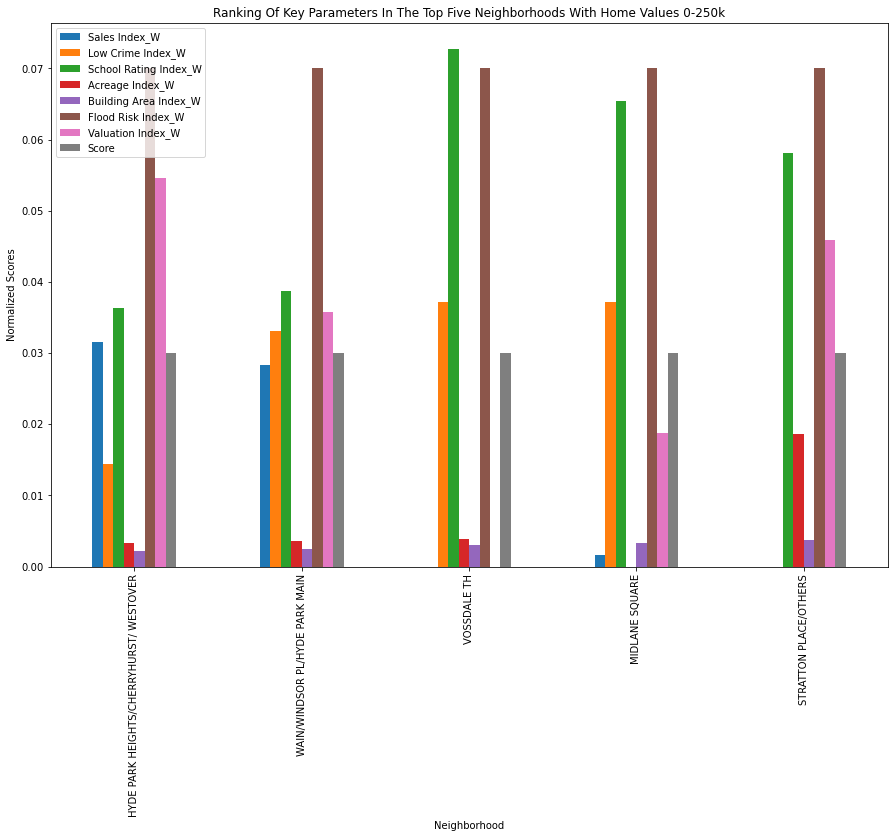

In [47]:
# bar plot
ranked_250k = ranked_250k.iloc[:,:-1]
ranked_250k.plot(kind='bar',figsize=(15,10))
plt.ylabel("Normalized Scores")
plt.title("Ranking Of Key Parameters In The Top Five Neighborhoods With Home Values 0-250k")
plt.show()

In [48]:
# TODO:
# bar charts per bins every 250k
# heat maps per parameter
# write a summary of observations

In [49]:
# bin the total appraised value column:
# bins = [0, 250000, 500000, 750000, 1000001]

# Create the names for the five bins
# group_names = ['0 - <250k', '250k - <450k', '500k - <750k', '750k - 1M']
# correlation_data["TOTAL_APPRAISED_VALUE"] = pd.cut(correlation_data["TOTAL_APPRAISED_VALUE"], bins,
#                                                    labels=group_names,include_lowest=True)
# correlation_data
# # create heat maps for each variable

In [50]:
# box plots
# def myplotbox(x):#,label_list):
#     fig=plt.figure(figsize=(15,15))
#     _=plt.boxplot(x)#, labels=label_list)
#     return fig

# x=only_public_schools["Normalized School Rating"]
# label_list="Normalized School Rating"
# f=myplotbox(x)#,label_list)
# plt.boxplot(x)